# Using WxData To Plot the 6-10 Day Climate Prediction Center Precipitation Outlook

***DISCLAIMER: This functionality will be coming to FireWxPy so the process will be easier and less raw when that happens!!!***

In this example, we will do the following:

1) Use WxData to download the latest CPC Outlook and return an organized geopandas.GeoDataFrame
2) Create a custom colormap in matplotlib.colors to reflect the colorscale used in the official CPC products
3) Create our contour levels and normalize our colorscale
4) Create our plot of the NOAA/CPC 6-10 Day Probabilistic Precipitation Forecast

## Imports

To complete this project, we need several imports:

1) pyplot from matplotlib
2) colors from matplotlib
3) crs from cartopy
4) feature from cartopy
5) `get_cpc_outlook()` from wxdata

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from wxdata import get_cpc_outlook

## Using `get_cpc_outlook` From WxData

Here are the default settings for `get_cpc_outlook`

    This function wraps the client module from the shapeography package as a private module _soclient
    
    This function will download the shapefiles for the latest NOAA Climate Prediction Center Outlook and return a clean geopandas.GeoDataFrame of the data
    
    Required Arguments:
    
    1) parameter (String) - The type of CPC Outlook.
    
        Parameter List
        --------------
        
        1) '6_10_day_precipitation'
        2) '6_10_day_temperature'
        3) '8_14_day_precipitation'
        4) '8_14_day_temperature'
        5) 'week_3_4_precipitation'
        6) 'week_3_4_temperature'
        7) 'monthly_precipitation'
        8) 'monthly_temperature'
        
    2) path (String) - The local directory where the CPC Outlook Shapefiles will download to
    
    3) filename (String) - The filename the user wants to save the CPC Outlook as
    
    Optional Arguments:
    
    1) proxies (dict or None) - Default=None. If the user is using a proxy server, the user must change the following:

        proxies=None ---> proxies={'http':'http://url',
                            'https':'https://url'
                            }
        
    2) chunk_size (Integer) - Default=8192. The size of the chunks when writing the GRIB/NETCDF data to a file.
    
    3) notifications (String) - Default='off'. Notification when a file is downloaded and saved to {path}
    
    4) clear_recycle_bin (Boolean) - When set to True, the contents in your recycle/trash bin will be deleted with each run of the program you are calling WxData. 
          This setting is to help preserve memory on the machine. 
          
    5) file_extension (String) - Default='.zip'. - The extension of the zip file. 
    
        Supported zip file extentions
        -----------------------------
            
            1) .zip
            2) .gz
            3) .tar.gz
            4) .tar
            
    6) crs (String) - Default='EPSG:4326' (ccrs.PlateCarree()) - The coordinate reference system the user wants the geometry coordinates in.  
    
    Returns
    -------
    
    A geopandas.GeoDataFrame of the calibrated CPC Probabilistic Forecast Data 

In [2]:
df = get_cpc_outlook('6_10_day_precipitation',
                    'Weather Data/CPC Outlooks',
                    '6_10_day_precipitation.zip')

Successfully saved 6_10_day_precipitation.zip to f:Weather Data/CPC Outlooks


In [3]:
df

,geometry,CPC Probabilities
0,"POLYGON ((-155.9502 19.4915, -155.6117 19.7822...",0.0
1,"MULTIPOLYGON (((-81.94044 26.46197, -81.94327 ...",0.0
2,"MULTIPOLYGON (((179.19985 51.36089, 179.19981 ...",0.0
3,"MULTIPOLYGON (((-179.11156 51.30158, -179.1070...",0.0
4,"MULTIPOLYGON (((-161.66126 58.55718, -161.6643...",-33.0
5,"MULTIPOLYGON (((-97.16871 25.97542, -97.17264 ...",-33.0
6,"MULTIPOLYGON (((-155.84985 20.26736, -155.8474...",33.0
7,"MULTIPOLYGON (((-76.01586 38.02786, -76.01533 ...",33.0
8,"MULTIPOLYGON (((-146.28713 59.46306, -146.2835...",33.0
9,"MULTIPOLYGON (((-81.97367 24.52353, -81.977 24...",33.0


## Creating Our Custom Colormap and Normalizing Our Custom Colormap

In [4]:
# Define our colormap as a list of colors in the order from lower values (Below Normal) to Above Normal
custom_cmap = mcolors.ListedColormap(['saddlebrown', 'darkgoldenrod', 'tan', 'burlywood', 'darkorange', 'orange', 'yellow', 'gray', 'yellowgreen', 'palegreen', 'springgreen', 'lime', 'seagreen', 'forestgreen', 'darkgreen']) 

# Define our contour levels - I am using the same breakpoints as NOAA/CPC
levels = [-100, -80, -70, -60, -50, -40, -33, 0, 33, 40, 50, 60, 70, 80, 100]

# Normalize our colormap to so it reflects our breakpoints in levels
norm = mcolors.BoundaryNorm(levels, custom_cmap.N)

## Creating Our Plot

<GeoAxes: title={'center': 'NOAA Climate Prediction Center Probabilistic 6-10 Day Precipitation Forecast'}>

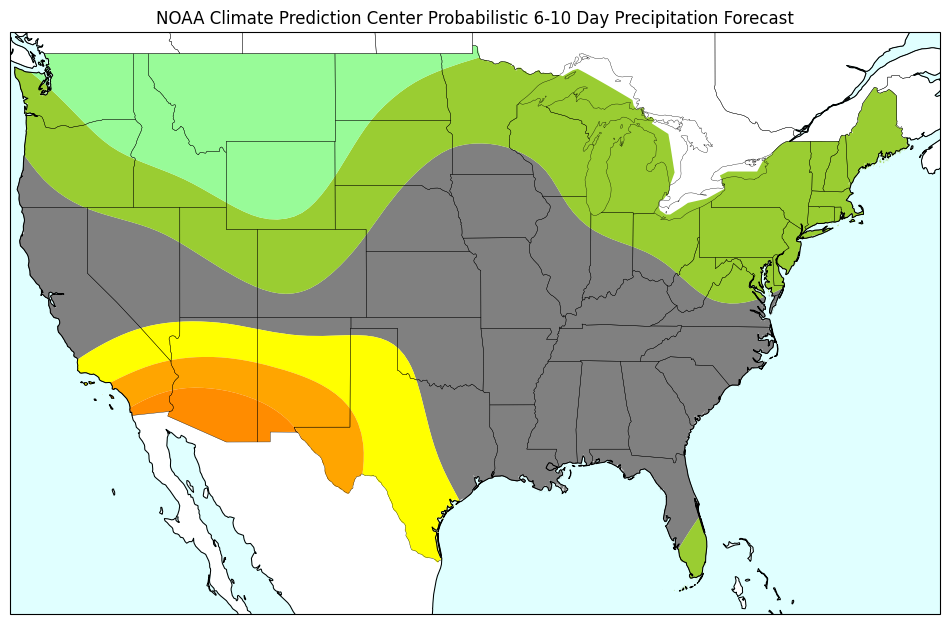

In [5]:
# Define our figure object with a figure size of 12x12
fig = plt.figure(figsize=(12,12))

# Create our subplot axis using a cartopy PlateCarree projection
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

# Set our boundaries in a latlon format of [western_bound, eastern_bound, southern_bound, northern_bound] followed by our PlateCarree projection
# Bounds of CONUS -125, -65, 23.5, 50
ax.set_extent([-125, -65, 23.5, 50], ccrs.PlateCarree())

# Add our features to the map 
# Add our coastlines
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.75, zorder=3)

# Add the oceans and color them light cyan
ax.add_feature(cfeature.OCEAN, color='lightcyan', zorder=1)

# Add our U.S. state boundaries
ax.add_feature(cfeature.STATES, linewidth=0.25, zorder=2)

# Define our plot title
ax.set_title('NOAA Climate Prediction Center Probabilistic 6-10 Day Precipitation Forecast')

# Plot our clean geopandas.GeoDataFrame showing our calibrated CPC Probabilities with our custom colormap
df.plot(ax=ax, 
         cmap=custom_cmap, 
         norm=norm,
         column='CPC Probabilities', 
         transform=ccrs.PlateCarree())